# MLP

Importing libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torchinfo import summary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torch


Check to see data info

In [10]:
df = pd.read_csv('./houses.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Check all dataset and fine a feature that has max orrelation against price

In [41]:
corr_mat = df.corr(numeric_only=True)
price_corr = df.corr(numeric_only=True).drop(['price'])['price']
max_idx = price_corr.idxmax()
max_value = price_corr.max()
print(f'Idx "{max_idx}" has the max correlation against price with value of: {max_value}')
corr_mat

Idx "sqft_living" has the max correlation against price with value of: 0.7020350546118005


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


Plot price dencity and price-feature

In [42]:
price = df['price']
max_corr_datas = df[max_idx]

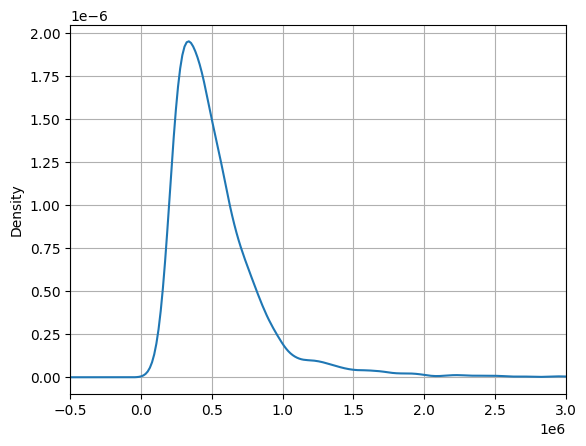

In [43]:
price.plot.kde()
plt.grid()
plt.xlim([-0.5e6,3e6])
plt.show()

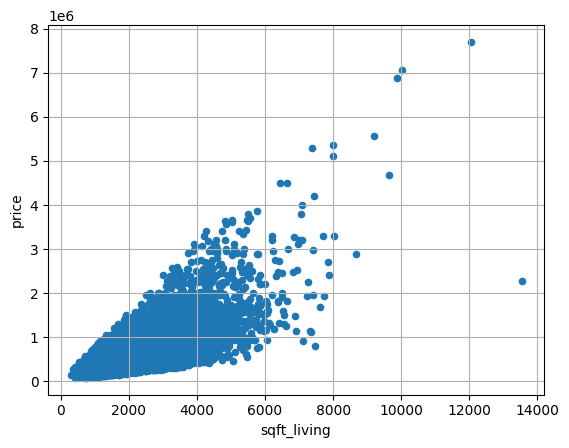

In [44]:
plt.scatter(max_corr_datas , price , s=20)
plt.grid()
plt.ylabel('price')
plt.xlabel(max_idx)
plt.show()

Split date feature into month and year

In [45]:
year =  df['date'].str[0:4].to_numpy(dtype = int)
month = df['date'].str[4:6].to_numpy(dtype = int)

In [46]:
df.insert(3 , 'month' , month)
df.insert(3 , 'year' , year)
df = df.drop('date' , axis=1)

train test split

In [47]:
df_train , df_test = train_test_split(df , train_size=0.8 , random_state=1)

scale datas into 0~1

In [48]:
scl = MinMaxScaler()
scl.fit(df_train.iloc[: , 2:])
x_train = scl.transform(df_train.iloc[: , 2:])
x_test  = scl.transform(df_test.iloc[: , 2:])

In [49]:
sclt = MinMaxScaler()
t_train = df_train['price'].to_numpy().copy().reshape(-1,1)
t_test = df_test['price'].to_numpy().copy().reshape(-1,1)
sclt.fit(t_train)
t_train = sclt.transform(t_train).reshape(-1)
t_test = sclt.transform(t_test).reshape(-1)

make a custom dataset for torch <br>
we could scal datas here too using torch transforms

In [50]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
class CustomDataset(Dataset):
    def __init__(self , data , targets):
        self.data = torch.tensor(data , dtype=torch.float32 , device=device)
        self.targets = torch.tensor(targets , dtype=torch.float32 , device=device)

    def __len__(self):
        return(len(self.data))

    def __getitem__(self,idx):
        data = self.data[idx]
        label = self.targets[idx]
        return data , label

In [51]:
train_dataset = CustomDataset(x_train , t_train)
test_dataset = CustomDataset(x_test , t_test)

In [52]:
batch_size = 14
trainloader = DataLoader(train_dataset , batch_size , shuffle=True)
testloadder = DataLoader(test_dataset , batch_size = 4323 , shuffle=True)

Make a model for regression

In [5]:
class MLP(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(20 , 100 , device=device)
        self.fc2 = torch.nn.Linear(100 , 100 , device=device)
        self.fc3 = torch.nn.Linear(100 , 100 , device=device)
        self.fc4 = torch.nn.Linear(100 , 1 , device=device)

    def forward(self , x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = self.fc4(x)
        return x

In [9]:
net = MLP()
summary(net , (1,20))

Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      [1, 1]                    --
├─Linear: 1-1                            [1, 100]                  2,100
├─Linear: 1-2                            [1, 100]                  10,100
├─Linear: 1-3                            [1, 100]                  10,100
├─Linear: 1-4                            [1, 1]                    101
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
Total mult-adds (M): 0.02
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.09
Estimated Total Size (MB): 0.09

Optimizer and loss function

In [55]:
loss_function = [torch.nn.MSELoss() , torch.nn.CrossEntropyLoss()]
optimizer = [torch.optim.Adam(net.parameters()) , torch.optim.RMSprop(net.parameters())]

train loop <br>
train for 100 epoch

In [56]:
loss_arr = np.array([])
vloss_arr = np.array([])
for epoch in range(100):
    running_loss = 0.0
    for i , data in enumerate(trainloader):
        xdata , label = data
        optimizer[0].zero_grad()
        output = net(xdata)
        loss = loss_function[0](output , label.reshape(-1,1))
        loss.backward()
        optimizer[0].step()
        
        running_loss = loss.item() + running_loss
    print(f'epoch={epoch} , running loss={running_loss : .4f}')
    vdata , vt = next(iter(testloadder))
    voutput = net(vdata)
    v_loss = loss_function[0](voutput , vt.reshape(-1,1))
    vloss_arr = np.append(vloss_arr , v_loss.item())
    loss_arr = np.append(loss_arr , running_loss/i)

epoch=0 , running loss= 3.3116
epoch=1 , running loss= 1.9365
epoch=2 , running loss= 1.7241
epoch=3 , running loss= 1.6132
epoch=4 , running loss= 1.5065
epoch=5 , running loss= 1.4612
epoch=6 , running loss= 1.4225
epoch=7 , running loss= 1.3961
epoch=8 , running loss= 1.3790
epoch=9 , running loss= 1.3742
epoch=10 , running loss= 1.3551
epoch=11 , running loss= 1.3270
epoch=12 , running loss= 1.3286
epoch=13 , running loss= 1.2984
epoch=14 , running loss= 1.3072
epoch=15 , running loss= 1.3240
epoch=16 , running loss= 1.2938
epoch=17 , running loss= 1.2769
epoch=18 , running loss= 1.2922
epoch=19 , running loss= 1.2659
epoch=20 , running loss= 1.2314
epoch=21 , running loss= 1.2288
epoch=22 , running loss= 1.2374
epoch=23 , running loss= 1.2063
epoch=24 , running loss= 1.2149
epoch=25 , running loss= 1.1897
epoch=26 , running loss= 1.1980
epoch=27 , running loss= 1.1929
epoch=28 , running loss= 1.1616
epoch=29 , running loss= 1.1726
epoch=30 , running loss= 1.1593
epoch=31 , running

Plot loss

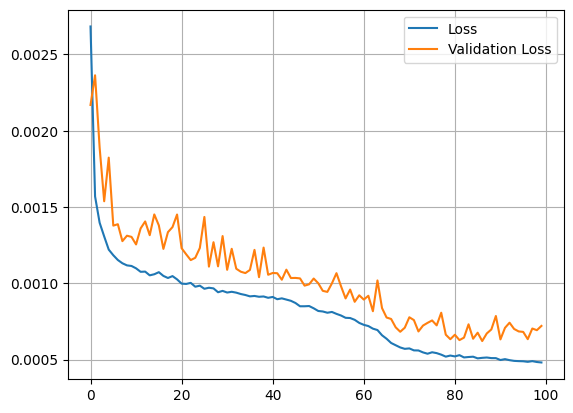

In [57]:
plt.plot(loss_arr , label = 'Loss')
plt.plot(vloss_arr , label = 'Validation Loss')
plt.grid()
plt.legend()
plt.show()


Test model

In [58]:
testloader = DataLoader(test_dataset , 5 , shuffle=True)

In [59]:
x , t = next(iter(testloader))
predicted_price = np.round(sclt.inverse_transform(net(x).detach().cpu()))

In [60]:
actual_price = np.round(sclt.inverse_transform(t.reshape(-1,1).cpu()))

In [61]:
print(f'Predicted Price for 5 random data :\n{predicted_price}\n')
print(f'Actual Price for 5 random data :\n{actual_price}')

Predicted Price for 5 random data :
[[ 325459.]
 [ 500075.]
 [ 701340.]
 [ 799181.]
 [1187370.]]

Actual Price for 5 random data :
[[ 294350.]
 [ 474900.]
 [ 750000.]
 [ 827500.]
 [1565000.]]
